(16384, 3)
(128, 128, 3)


Text(0.5, 1.0, 'RBF interpolation')

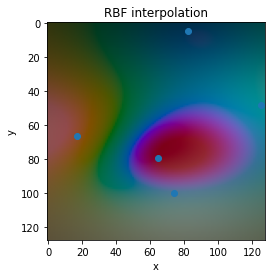

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ciecam02 import rgb2jch, jch2rgb
from scipy.interpolate import Rbf
x = [-2.968632936,-4.528208733,-3.238331079,-1.581794739,-2.753558159]
y = [0.178786859,-1.387471557,-0.787130058,-2.248958111,-4.271862507]
# white-yellow-red-blue-black
# rgb = np.array([[200, 200, 200], 
#                     [255, 187, 0],
#                     [128, 0, 32],
#                     [0, 140, 149],
#                     [0, 0, 0]
#                     ])
# rgb = np.array([[230, 230, 230],
#                 [254, 187, 0],
#                 [128, 0, 32],
#                 [0, 140, 149],
#                 [68, 68, 68]
#                 ])
rgb = np.array([[81, 118, 147],
                [143, 75, 40],
                [128, 0, 32],
                [0, 140, 149],
                [0, 49, 83]
                ])
jch=rgb2jch(rgb)
jjj=jch[:,0]
ccc=jch[:,1]
hhh=jch[:,2]
# print(jch)
# print(jjj)
# rbfj = Rbf(x, y, jjj, function='linear')
# rbfc = Rbf(x, y, ccc, function='linear')
# rbfh = Rbf(x, y, hhh, function='linear')
rbfj = Rbf(x, y, jjj, function='inverse')
rbfc = Rbf(x, y, ccc, function='inverse')
rbfh = Rbf(x, y, hhh, function='inverse')
dimx = 128
dimy = 128
xmin = -5
xmax = -1.5
ymin = -4.5
ymax = 1.5
x_new = np.linspace(xmin, xmax, dimx)
y_new= np.linspace(ymin, ymax, dimy)
x_grid, y_grid = np.meshgrid(x_new, y_new)
xi=x_grid.ravel()
yi=y_grid.ravel()
# xi=[-3.140700817,-4.655617714,-4.523247719,-4.429934025,-1.504244208,-3.824779987,-3.906730175,-3.413937092,-4.269578934,-1.886649609,-3.309570789,-1.373338819,-2.883019924,-2.77603507,-2.738422632,-2.987339973,-2.257733583,-2.261112452,-2.423458576,-3.002579689,-3.841306448,-4.049615383,-2.297468424,-1.513089895,-3.865788221,-4.109154224,-2.597402573,-3.590692997,-2.100105047,-2.701319695,-2.664515972,-1.91862309,-1.977849483,-3.960914612,-3.765055656,-2.559403658,-2.083695889,-2.545398951,-1.41849494,-4.61407423,-2.168384314,-1.60704124,-2.97184515,-3.198005676,-3.057582855,-2.354230642,-2.4959867,-2.003940582,-3.425074339,-3.735731125,-2.563746929,-2.309523344,-1.73198545]
# yi=[0.942083657,-1.043939829,-0.609639764,-0.079158716,-0.00548108,0.357004225,-0.022498643,0.252200156,-0.515816808,0.680230796,-1.132460117,-1.060228109,-0.620351553,-1.917709827,-0.071033478,-3.009689093,1.252760172,-3.802080393,1.586563945,-0.276521504,-3.153040886,-0.543394983,-3.011219263,-2.76542902,-3.743286133,-2.61918664,-4.429816246,-3.355566978,-2.541544199,-2.368893623,-1.804931641,-2.582026482,-4.042625904,-1.899103045,-2.320254803,-3.592699766,-3.465502024,-2.752537489,-0.615175426,-1.565720201,1.319137931,-0.711083055,-3.365247965,-4.076366901,-3.728332996,0.802957475,-3.973608017,0.899944186,-0.160854667,-3.632935047,1.226793647,0.324441075,-1.045446277]
jjji = rbfj(xi, yi)  
ccci = rbfc(xi, yi)
hhhi = rbfh(xi, yi)
for i in range(len(jjji)):
    if jjji[i]<=0:
        jjji[i]=0.01
    elif jjji[i]>=100:
        jjji[i]=99.99
for i in range(len(hhhi)):
    if hhhi[i]<=0:
        hhhi[i]=0.01
    elif hhhi[i]>=360:
        hhhi[i]=359.99
for i in range(len(ccci)):
    if ccci[i]<=0:
        ccci[i]=0.01
bac1=np.array([jjji,ccci,hhhi])
# print(bac1)
newjch=bac1.transpose()
newjch=newjch.astype(np.float32)
# print(newjch)
newrgb=jch2rgb(newjch)
# print(newrgb)

print(newrgb.shape)
newrgb2d = np.reshape(newrgb,(dimx,dimy,3))
print(newrgb2d.shape)
plt.imshow(newrgb2d);
xnp = np.array(x)
ynp = np.array(y)
plt.plot((xnp - xmin)/(xmax-xmin)*dimx, (ynp - ymin)/(ymax-ymin)*dimy, 'o');
plt.xlabel('x'); plt.ylabel('y')
plt.title('RBF interpolation')


(16384, 3)
(128, 128, 3)


Text(0.5, 1.0, 'RBF interpolation')

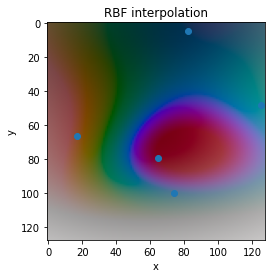